In [11]:
%matplotlib inline


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [2]:
!pip install -U albumentations
import torch
import torchvision
import torchvision.transforms as transforms
import albumentations as A
from __future__ import print_function
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 7.7 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [3]:
SEED = 1

cuda = torch.cuda.is_available()
print("CUDA available" , cuda)

#for Reproducibilty
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)

CUDA available True


In [12]:
import shutil

In [30]:
!git clone https://github.com/shreyash-99/EVA8.git

Cloning into 'EVA8'...
remote: Enumerating objects: 656, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 656 (delta 24), reused 25 (delta 9), pack-reused 613
Receiving objects: 100% (656/656), 7.51 MiB | 35.59 MiB/s, done.
Resolving deltas: 100% (388/388), done.


In [31]:
%cd EVA8/Session_6_Assignment

/content/EVA8/Session_6_Assignment


In [ ]:
pwd

'/EVA8/Session_6_Assignment'

In [27]:
%cd ..

/content/EVA8


In [28]:
%cd ..

/content


In [29]:
shutil.rmtree('EVA8')

In [ ]:
%ls

sample_data/


In [32]:
from model3 import *

In [33]:
model_sample = Net()

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [35]:
image_dimension = (3,32,32)
get_model_summary(model_sample, device , image_dimension )

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4          [-1, 192, 32, 32]           6,144
              ReLU-5          [-1, 192, 32, 32]               0
       BatchNorm2d-6          [-1, 192, 32, 32]             384
            Conv2d-7          [-1, 192, 32, 32]           1,728
              ReLU-8          [-1, 192, 32, 32]               0
       BatchNorm2d-9          [-1, 192, 32, 32]             384
           Conv2d-10           [-1, 32, 32, 32]           6,144
             ReLU-11           [-1, 32, 32, 32]               0
      BatchNorm2d-12           [-1, 32, 32, 32]              64
           Conv2d-13           [-1, 32, 16, 16]           9,216
      BatchNorm2d-14           [-1, 32,

In [36]:
from train_new import train


In [37]:
from testing_code import test

In [38]:
from utils2 import *

In [39]:
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [41]:
from data_loader import *

In [42]:
BATCH_SIZE = 128

In [43]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [44]:
train_loader = torch.utils.data.DataLoader(Albumentation_cifar_Dataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(Albumentation_cifar_Dataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

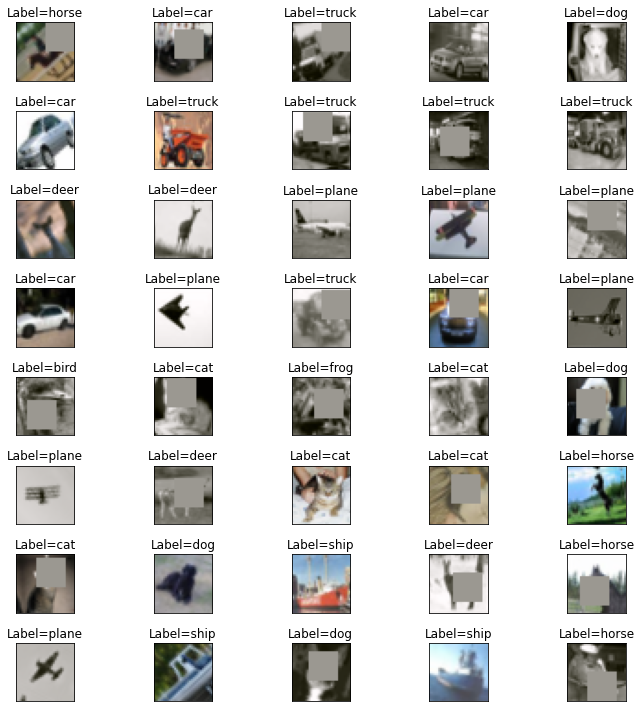

In [45]:
visualize_augmented_images(train_loader, classes, 8,5)

In [48]:
training = train()

In [49]:
testing = test()

In [51]:
print(type(test_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [53]:
EPOCHS = 100
from torch.optim.lr_scheduler import StepLR

# model =  model_GN.to(device)
model_sample = model_sample.to(device)
optimizer = optim.SGD(model_sample.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
criterion = nn.CrossEntropyLoss()

for epoch in range(EPOCHS):
  print("EPOCH:", epoch, "Learning Rate: ", scheduler.get_last_lr())
  training.execute_training(model_sample, train_loader, device, optimizer,criterion , epoch)
  scheduler.step()
  testing.execute(model_sample, test_loader, device, criterion, epoch)


EPOCH: 0 Learning Rate:  [0.02]


Loss=1.2988975048065186 Batch_id=390 Accuracy=54.31: 100%|██████████| 391/391 [00:21<00:00, 18.01it/s]


Test set: Average loss: 0.0073, Accuracy: 6693/10000 (66.93%)

EPOCH: 1 Learning Rate:  [0.02]


Loss=1.1493494510650635 Batch_id=390 Accuracy=59.66: 100%|██████████| 391/391 [00:21<00:00, 18.60it/s]


Test set: Average loss: 0.0065, Accuracy: 7162/10000 (71.62%)

EPOCH: 2 Learning Rate:  [0.02]


Loss=0.9602401852607727 Batch_id=390 Accuracy=62.83: 100%|██████████| 391/391 [00:21<00:00, 18.19it/s]


Test set: Average loss: 0.0063, Accuracy: 7296/10000 (72.96%)

EPOCH: 3 Learning Rate:  [0.02]


Loss=0.9939096570014954 Batch_id=390 Accuracy=64.79: 100%|██████████| 391/391 [00:20<00:00, 19.02it/s]


Test set: Average loss: 0.0054, Accuracy: 7689/10000 (76.89%)

EPOCH: 4 Learning Rate:  [0.02]


Loss=1.050584077835083 Batch_id=390 Accuracy=66.53: 100%|██████████| 391/391 [00:20<00:00, 18.76it/s]


Test set: Average loss: 0.0054, Accuracy: 7628/10000 (76.28%)

EPOCH: 5 Learning Rate:  [0.02]


Loss=1.0038050413131714 Batch_id=390 Accuracy=67.77: 100%|██████████| 391/391 [00:21<00:00, 18.47it/s]


Test set: Average loss: 0.0050, Accuracy: 7730/10000 (77.30%)

EPOCH: 6 Learning Rate:  [0.002]


Loss=0.9595133662223816 Batch_id=390 Accuracy=71.15: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]


Test set: Average loss: 0.0044, Accuracy: 8051/10000 (80.51%)

EPOCH: 7 Learning Rate:  [0.002]


Loss=0.8464618921279907 Batch_id=390 Accuracy=72.11: 100%|██████████| 391/391 [00:20<00:00, 19.03it/s]


Test set: Average loss: 0.0043, Accuracy: 8088/10000 (80.88%)

EPOCH: 8 Learning Rate:  [0.002]


Loss=0.8690717816352844 Batch_id=390 Accuracy=72.35: 100%|██████████| 391/391 [00:20<00:00, 19.22it/s]


Test set: Average loss: 0.0043, Accuracy: 8120/10000 (81.20%)

EPOCH: 9 Learning Rate:  [0.002]


Loss=0.7950992584228516 Batch_id=390 Accuracy=73.11: 100%|██████████| 391/391 [00:21<00:00, 18.47it/s]


Test set: Average loss: 0.0042, Accuracy: 8169/10000 (81.69%)

EPOCH: 10 Learning Rate:  [0.002]


Loss=0.7981658577919006 Batch_id=390 Accuracy=73.20: 100%|██████████| 391/391 [00:22<00:00, 17.76it/s]


Test set: Average loss: 0.0042, Accuracy: 8192/10000 (81.92%)

EPOCH: 11 Learning Rate:  [0.002]


Loss=0.7043089866638184 Batch_id=390 Accuracy=73.32: 100%|██████████| 391/391 [00:22<00:00, 17.70it/s]


Test set: Average loss: 0.0042, Accuracy: 8180/10000 (81.80%)

EPOCH: 12 Learning Rate:  [0.0002]


Loss=0.7062903642654419 Batch_id=390 Accuracy=73.71: 100%|██████████| 391/391 [00:22<00:00, 17.68it/s]


Test set: Average loss: 0.0041, Accuracy: 8215/10000 (82.15%)

EPOCH: 13 Learning Rate:  [0.0002]


Loss=0.7138756513595581 Batch_id=390 Accuracy=73.82: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]


Test set: Average loss: 0.0041, Accuracy: 8215/10000 (82.15%)

EPOCH: 14 Learning Rate:  [0.0002]


Loss=1.0158342123031616 Batch_id=390 Accuracy=73.89: 100%|██████████| 391/391 [00:21<00:00, 17.87it/s]


Test set: Average loss: 0.0041, Accuracy: 8221/10000 (82.21%)

EPOCH: 15 Learning Rate:  [0.0002]


Loss=0.5820968747138977 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:21<00:00, 18.43it/s]


Test set: Average loss: 0.0041, Accuracy: 8195/10000 (81.95%)

EPOCH: 16 Learning Rate:  [0.0002]


Loss=0.8280287981033325 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:21<00:00, 18.38it/s]


Test set: Average loss: 0.0041, Accuracy: 8215/10000 (82.15%)

EPOCH: 17 Learning Rate:  [0.0002]


Loss=0.7364236116409302 Batch_id=390 Accuracy=73.90: 100%|██████████| 391/391 [00:22<00:00, 17.63it/s]


Test set: Average loss: 0.0041, Accuracy: 8214/10000 (82.14%)

EPOCH: 18 Learning Rate:  [2e-05]


Loss=0.8920649290084839 Batch_id=390 Accuracy=74.08: 100%|██████████| 391/391 [00:22<00:00, 17.49it/s]


Test set: Average loss: 0.0041, Accuracy: 8210/10000 (82.10%)

EPOCH: 19 Learning Rate:  [2e-05]


Loss=0.787276566028595 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:22<00:00, 17.72it/s]


Test set: Average loss: 0.0041, Accuracy: 8218/10000 (82.18%)

EPOCH: 20 Learning Rate:  [2e-05]


Loss=0.8222585916519165 Batch_id=390 Accuracy=73.97: 100%|██████████| 391/391 [00:22<00:00, 17.53it/s]


Test set: Average loss: 0.0041, Accuracy: 8221/10000 (82.21%)

EPOCH: 21 Learning Rate:  [2e-05]


Loss=0.6888822913169861 Batch_id=390 Accuracy=74.12: 100%|██████████| 391/391 [00:21<00:00, 17.85it/s]


Test set: Average loss: 0.0041, Accuracy: 8216/10000 (82.16%)

EPOCH: 22 Learning Rate:  [2e-05]


Loss=0.6382028460502625 Batch_id=390 Accuracy=73.98: 100%|██████████| 391/391 [00:21<00:00, 18.17it/s]


Test set: Average loss: 0.0041, Accuracy: 8223/10000 (82.23%)

EPOCH: 23 Learning Rate:  [2e-05]


Loss=0.869347095489502 Batch_id=390 Accuracy=73.77: 100%|██████████| 391/391 [00:21<00:00, 18.48it/s]


Test set: Average loss: 0.0041, Accuracy: 8240/10000 (82.40%)

EPOCH: 24 Learning Rate:  [2.0000000000000003e-06]


Loss=0.7981364130973816 Batch_id=390 Accuracy=74.09: 100%|██████████| 391/391 [00:21<00:00, 18.46it/s]


Test set: Average loss: 0.0041, Accuracy: 8208/10000 (82.08%)

EPOCH: 25 Learning Rate:  [2.0000000000000003e-06]


Loss=0.987075686454773 Batch_id=390 Accuracy=74.03: 100%|██████████| 391/391 [00:22<00:00, 17.63it/s]


Test set: Average loss: 0.0041, Accuracy: 8208/10000 (82.08%)

EPOCH: 26 Learning Rate:  [2.0000000000000003e-06]


Loss=0.9688516855239868 Batch_id=390 Accuracy=73.93: 100%|██████████| 391/391 [00:22<00:00, 17.37it/s]


Test set: Average loss: 0.0041, Accuracy: 8207/10000 (82.07%)

EPOCH: 27 Learning Rate:  [2.0000000000000003e-06]


Loss=0.7629230618476868 Batch_id=390 Accuracy=73.77: 100%|██████████| 391/391 [00:21<00:00, 18.09it/s]


Test set: Average loss: 0.0041, Accuracy: 8223/10000 (82.23%)

EPOCH: 28 Learning Rate:  [2.0000000000000003e-06]


Loss=0.7736589908599854 Batch_id=390 Accuracy=74.20: 100%|██████████| 391/391 [00:21<00:00, 18.09it/s]


Test set: Average loss: 0.0041, Accuracy: 8210/10000 (82.10%)

EPOCH: 29 Learning Rate:  [2.0000000000000003e-06]


Loss=0.7607413530349731 Batch_id=390 Accuracy=74.34: 100%|██████████| 391/391 [00:21<00:00, 18.52it/s]


Test set: Average loss: 0.0041, Accuracy: 8233/10000 (82.33%)

EPOCH: 30 Learning Rate:  [2.0000000000000004e-07]


Loss=0.6396368741989136 Batch_id=390 Accuracy=74.38: 100%|██████████| 391/391 [00:21<00:00, 18.35it/s]


Test set: Average loss: 0.0041, Accuracy: 8203/10000 (82.03%)

EPOCH: 31 Learning Rate:  [2.0000000000000004e-07]


Loss=0.7214378118515015 Batch_id=390 Accuracy=73.91: 100%|██████████| 391/391 [00:21<00:00, 18.58it/s]


Test set: Average loss: 0.0041, Accuracy: 8221/10000 (82.21%)

EPOCH: 32 Learning Rate:  [2.0000000000000004e-07]


Loss=0.7994560599327087 Batch_id=390 Accuracy=74.15: 100%|██████████| 391/391 [00:21<00:00, 18.03it/s]


Test set: Average loss: 0.0041, Accuracy: 8221/10000 (82.21%)

EPOCH: 33 Learning Rate:  [2.0000000000000004e-07]


Loss=0.7806957364082336 Batch_id=390 Accuracy=74.05: 100%|██████████| 391/391 [00:21<00:00, 17.87it/s]


Test set: Average loss: 0.0041, Accuracy: 8228/10000 (82.28%)

EPOCH: 34 Learning Rate:  [2.0000000000000004e-07]


Loss=0.7960412502288818 Batch_id=390 Accuracy=74.11: 100%|██████████| 391/391 [00:21<00:00, 17.82it/s]


Test set: Average loss: 0.0041, Accuracy: 8233/10000 (82.33%)

EPOCH: 35 Learning Rate:  [2.0000000000000004e-07]


Loss=0.6544651985168457 Batch_id=390 Accuracy=73.98: 100%|██████████| 391/391 [00:21<00:00, 17.97it/s]


Test set: Average loss: 0.0041, Accuracy: 8225/10000 (82.25%)

EPOCH: 36 Learning Rate:  [2.0000000000000007e-08]


Loss=0.8115663528442383 Batch_id=390 Accuracy=73.95: 100%|██████████| 391/391 [00:21<00:00, 18.57it/s]


Test set: Average loss: 0.0041, Accuracy: 8223/10000 (82.23%)

EPOCH: 37 Learning Rate:  [2.0000000000000007e-08]


Loss=0.7455829977989197 Batch_id=390 Accuracy=74.17: 100%|██████████| 391/391 [00:20<00:00, 18.74it/s]


Test set: Average loss: 0.0041, Accuracy: 8213/10000 (82.13%)

EPOCH: 38 Learning Rate:  [2.0000000000000007e-08]


Loss=0.816857635974884 Batch_id=390 Accuracy=74.15: 100%|██████████| 391/391 [00:21<00:00, 17.91it/s]


Test set: Average loss: 0.0041, Accuracy: 8239/10000 (82.39%)

EPOCH: 39 Learning Rate:  [2.0000000000000007e-08]


Loss=0.7667115330696106 Batch_id=390 Accuracy=73.96: 100%|██████████| 391/391 [00:21<00:00, 18.55it/s]


Test set: Average loss: 0.0041, Accuracy: 8231/10000 (82.31%)

EPOCH: 40 Learning Rate:  [2.0000000000000007e-08]


Loss=0.8682786226272583 Batch_id=390 Accuracy=74.25: 100%|██████████| 391/391 [00:21<00:00, 17.89it/s]


Test set: Average loss: 0.0041, Accuracy: 8226/10000 (82.26%)

EPOCH: 41 Learning Rate:  [2.0000000000000007e-08]


Loss=0.7549812197685242 Batch_id=390 Accuracy=73.94: 100%|██████████| 391/391 [00:21<00:00, 17.94it/s]


Test set: Average loss: 0.0041, Accuracy: 8228/10000 (82.28%)

EPOCH: 42 Learning Rate:  [2.000000000000001e-09]


Loss=0.9881766438484192 Batch_id=390 Accuracy=73.92: 100%|██████████| 391/391 [00:21<00:00, 17.86it/s]


Test set: Average loss: 0.0041, Accuracy: 8223/10000 (82.23%)

EPOCH: 43 Learning Rate:  [2.000000000000001e-09]


Loss=0.7013812065124512 Batch_id=390 Accuracy=74.14: 100%|██████████| 391/391 [00:21<00:00, 18.43it/s]


Test set: Average loss: 0.0041, Accuracy: 8218/10000 (82.18%)

EPOCH: 44 Learning Rate:  [2.000000000000001e-09]


Loss=0.8715184330940247 Batch_id=390 Accuracy=73.74: 100%|██████████| 391/391 [00:20<00:00, 18.75it/s]


Test set: Average loss: 0.0041, Accuracy: 8224/10000 (82.24%)

EPOCH: 45 Learning Rate:  [2.000000000000001e-09]


Loss=0.715060830116272 Batch_id=390 Accuracy=74.00: 100%|██████████| 391/391 [00:21<00:00, 18.59it/s]


Test set: Average loss: 0.0041, Accuracy: 8229/10000 (82.29%)

EPOCH: 46 Learning Rate:  [2.000000000000001e-09]


Loss=0.6206969022750854 Batch_id=390 Accuracy=74.36: 100%|██████████| 391/391 [00:21<00:00, 17.99it/s]


Test set: Average loss: 0.0041, Accuracy: 8224/10000 (82.24%)

EPOCH: 47 Learning Rate:  [2.000000000000001e-09]


Loss=0.6678602695465088 Batch_id=390 Accuracy=74.44: 100%|██████████| 391/391 [00:21<00:00, 18.07it/s]


Test set: Average loss: 0.0041, Accuracy: 8239/10000 (82.39%)

EPOCH: 48 Learning Rate:  [2.000000000000001e-10]


Loss=0.7610061168670654 Batch_id=390 Accuracy=74.07: 100%|██████████| 391/391 [00:21<00:00, 18.05it/s]


Test set: Average loss: 0.0041, Accuracy: 8244/10000 (82.44%)

EPOCH: 49 Learning Rate:  [2.000000000000001e-10]


Loss=0.7250365018844604 Batch_id=390 Accuracy=74.11: 100%|██████████| 391/391 [00:21<00:00, 18.12it/s]


Test set: Average loss: 0.0041, Accuracy: 8226/10000 (82.26%)

EPOCH: 50 Learning Rate:  [2.000000000000001e-10]


Loss=0.7582500576972961 Batch_id=390 Accuracy=74.12: 100%|██████████| 391/391 [00:22<00:00, 17.59it/s]


Test set: Average loss: 0.0041, Accuracy: 8221/10000 (82.21%)

EPOCH: 51 Learning Rate:  [2.000000000000001e-10]


Loss=0.7841275930404663 Batch_id=390 Accuracy=74.10: 100%|██████████| 391/391 [00:20<00:00, 18.82it/s]


Test set: Average loss: 0.0041, Accuracy: 8224/10000 (82.24%)

EPOCH: 52 Learning Rate:  [2.000000000000001e-10]


Loss=0.8744977712631226 Batch_id=390 Accuracy=73.68: 100%|██████████| 391/391 [00:20<00:00, 18.70it/s]


Test set: Average loss: 0.0041, Accuracy: 8213/10000 (82.13%)

EPOCH: 53 Learning Rate:  [2.000000000000001e-10]


Loss=0.8208705186843872 Batch_id=390 Accuracy=74.16: 100%|██████████| 391/391 [00:21<00:00, 18.19it/s]


Test set: Average loss: 0.0041, Accuracy: 8227/10000 (82.27%)

EPOCH: 54 Learning Rate:  [2.0000000000000012e-11]


Loss=0.7406205534934998 Batch_id=367 Accuracy=73.86:  94%|█████████▍| 368/391 [00:20<00:01, 17.99it/s]


KeyboardInterrupt: ignored

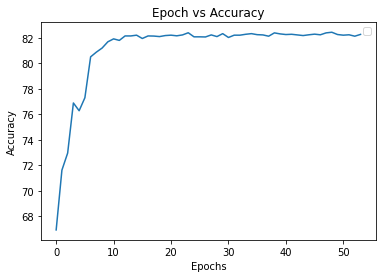

In [54]:
compute_accuracy_graph(testing.test_accuracies)

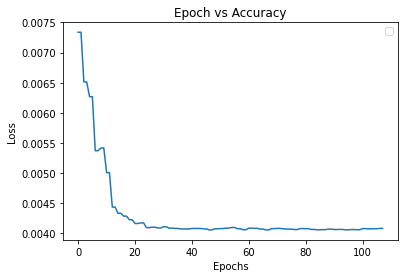

In [55]:
compute_loss_graph(testing.test_losses)

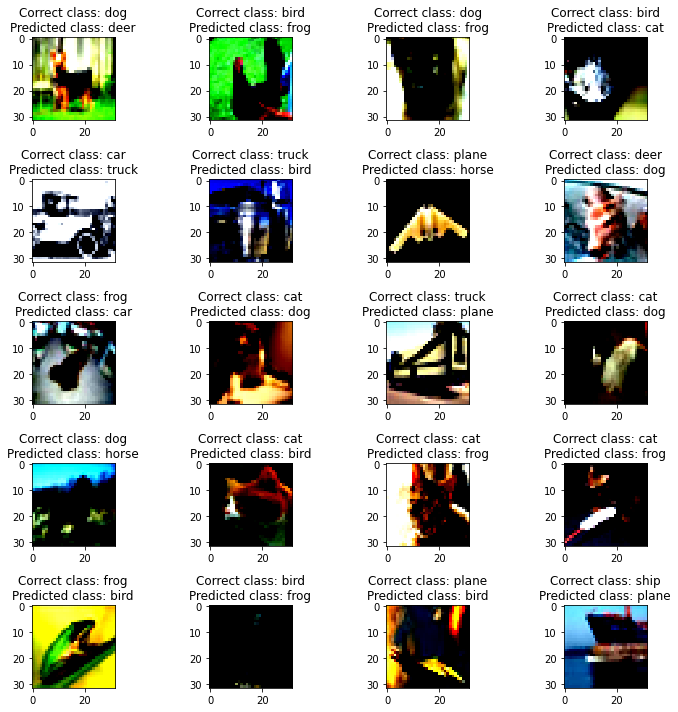

In [58]:
plot_misclassified_images(model_sample, test_loader, classes,device)

In [ ]:
print(device)

cuda
